<a href="https://colab.research.google.com/github/kiraaa66/algGNEP/blob/main/draft1SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Such

In [1]:
import numpy as np
from scipy.optimize import minimize
#!python -m pip install -U pandas
import pandas as pd
import itertools
import jax.numpy as jnp
from jax import random as jrandom
from jax import nn as jnn
from jax import jit
import numpy as np
from numpy import random

import random
import math
import time
import sys
import jax
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize, Bounds, LinearConstraint, NonlinearConstraint
from scipy import stats
#!pip install scikit-learn
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

# Randomize Function

In [2]:
def randomY(maxY, minY):
  return random.uniform(minY, maxY)

#Generate & Set Children

In [3]:
#alpha = np.random.normal(loc = 0.0, scale = 1.0, size = 1)
def generateChild():
  #https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
  #https://www.w3schools.com/python/numpy/numpy_random_normal.asp
  child = np.random.normal(loc = 0.0, scale = abs(math.pow(0.99, num)), size = 5000)
  #print(child)
  return child

In [4]:
def addChild(childX, val):
  i = int(val/50)
  childX += setX[i]
  #childY += setY[val]
  #val += 1
  return childX

In [5]:
def addChild2(childY, val):
  i = int(val/50)
  childY += setY[i]
  #childY += setY[val]
  #val += 1
  return childY

In [15]:
def addParent(parent, b):
  parent += b
  return parent

#Evaluation of Children

In [6]:
def pen(a,b):
  #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.golden.html
  def func1(x):
    return (math.pow(x-a,2))
  
  def func2(x):
    return (math.pow(x-b,2))

  min1 = optimize.golden(func1, brack=(0,1), maxiter = 5)
  min2 = optimize.golden(func2, brack=(0,1), maxiter = 5)
  shadowX = min1
  shadowY = min2
  
  pen = math.sqrt((math.pow(shadowX-a,2))+(math.pow(shadowY-b,2)))  
  return pen

#Transformation of Points

In [7]:
def transform(a,b,c):
  i = int(c/50)
  newSum = b * (penaltyParent[i] - a) 
  return newSum

In [8]:
def add(b, c):
  #val2, val, sum1
  j = int(b/50)
  i = b % 50
  d = 0 + j*50
  e = 50 + j*50
  #arr = sum1[j,:]
  if i == 0:
    beta = float(1/50)*(sum(c[d:e]))
    return beta
  else:
    return 0

# Declaring All Arrays

In [9]:
#https://www.studytonight.com/python-howtos/how-to-declare-an-array-in-python
#https://linuxhint.com/numpy-create-2d-array/
#https://www.pluralsight.com/guides/different-ways-create-numpy-arrays
setXY = np.zeros(200)
setXY = setXY.reshape(100,2)

setX = np.empty(500, dtype=object)
setY = np.empty(500, dtype=object)

children = np.zeros(5000)
#childrenX = childrenX.reshape(100, 50)
childrenY = np.zeros(5000)
#childrenY = childrenY.reshape(100, 50)
sum1 = np.zeros(5000)
beta = np.zeros(100)

# Runthrough of Code

[   0    1    2 ... 4997 4998 4999]
1
2
3
4
5
6
7
8
9
10


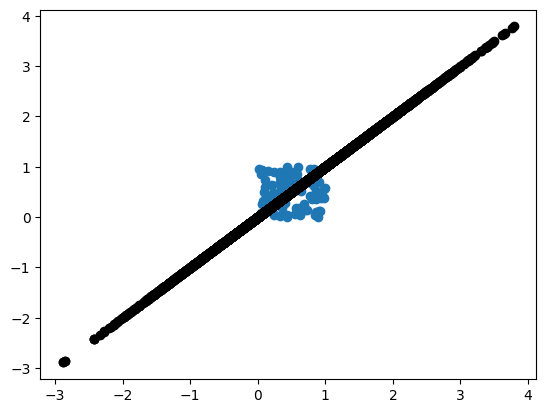

11
12
13
14
15
16
17
18
19
20


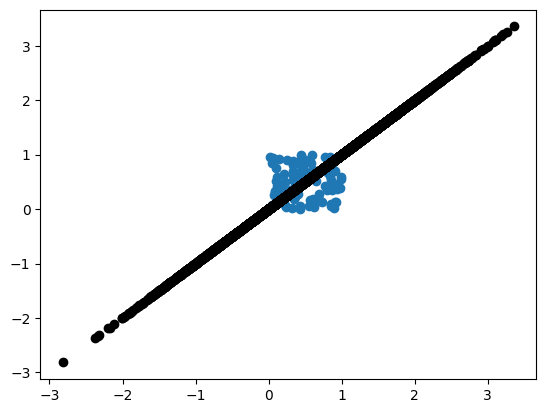

21
22
23
24
25
26
27
28
29
30


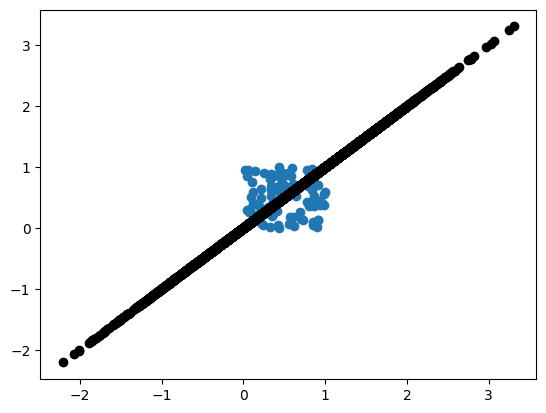

31
32
33
34
35
36
37
38
39
40


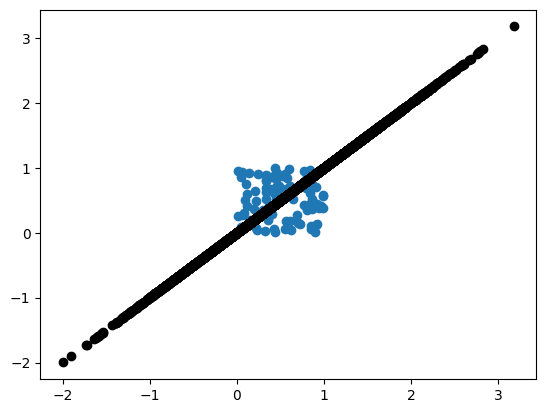

41
42
43
44
45
46
47
48
49
50


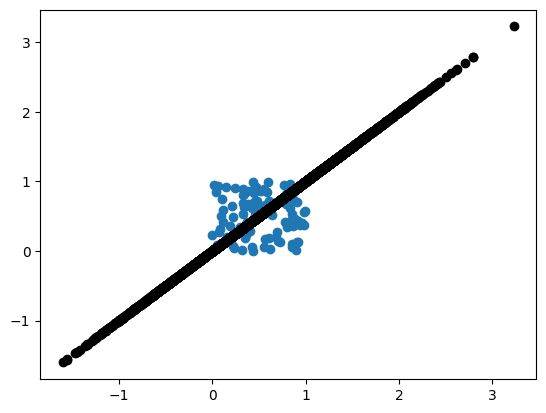

51
52
53
54
55
56
57
58
59
60


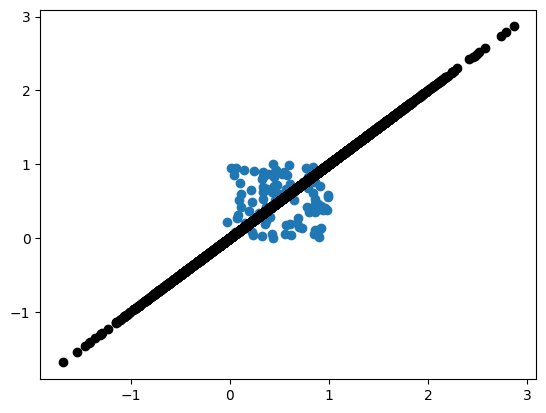

61
62
63
64
65
66
67
68
69
70


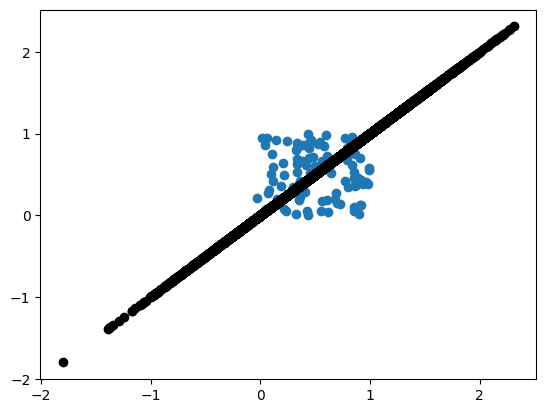

71
72
73
74
75
76
77
78
79
80


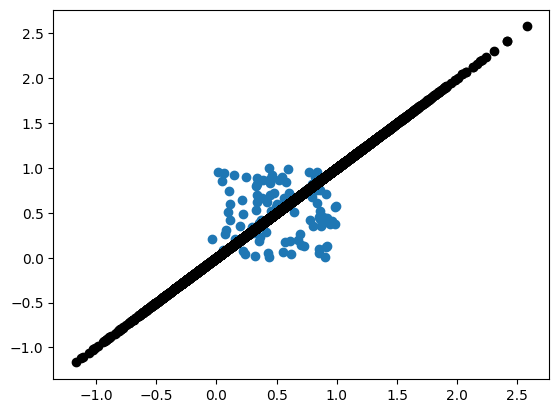

81
82
83
84
85
86
87
88
89
90


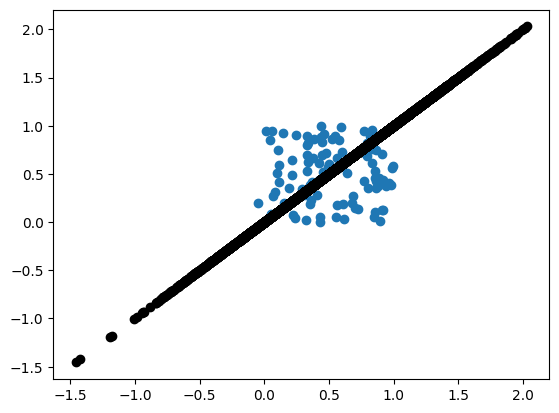

91
92
93
94
95
96
97
98
99
100


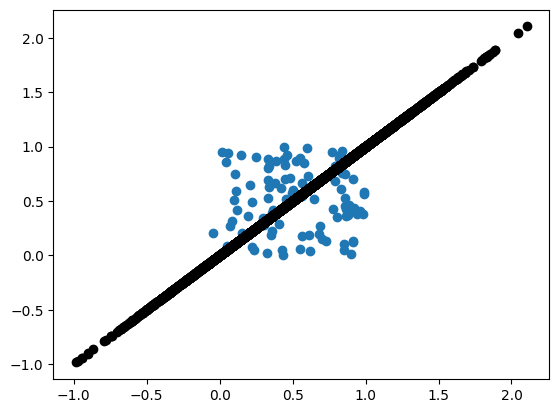

101
102
103
104
105
106
107
108
109
110


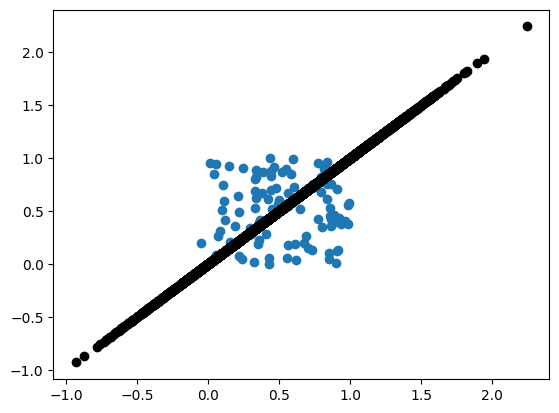

111
112
113
114
115
116
117
118
119
120


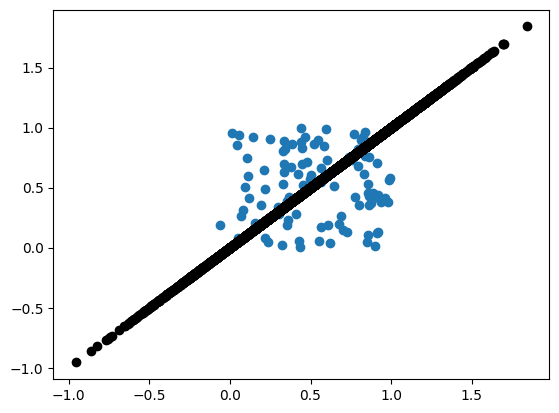

121
122
123
124
125
126
127
128
129
130


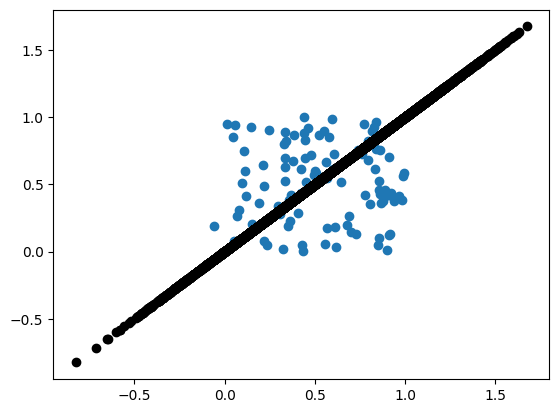

131
132
133
134
135
136
137
138
139
140


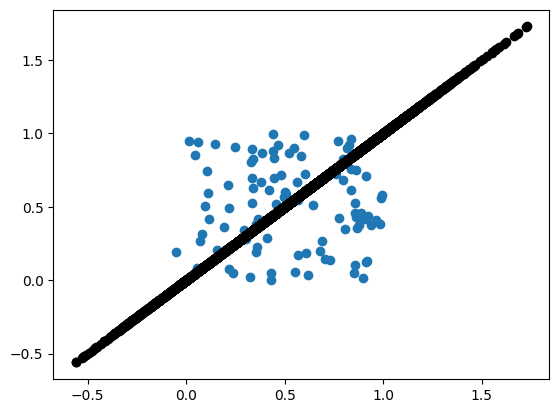

141
142
143
144
145
146
147
148
149
150


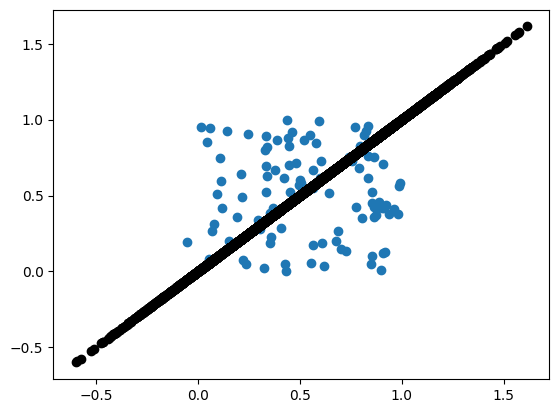

151
152
153
154
155
156
157
158
159
160


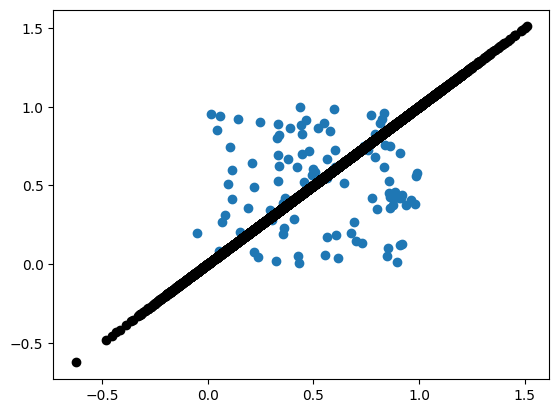

161
162
163
164
165
166
167
168
169
170


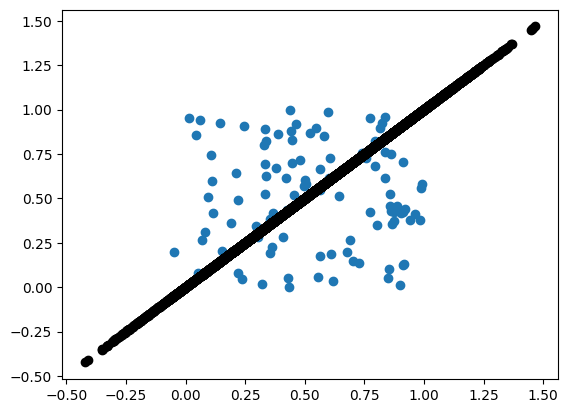

171
172
173
174
175
176
177
178
179
180


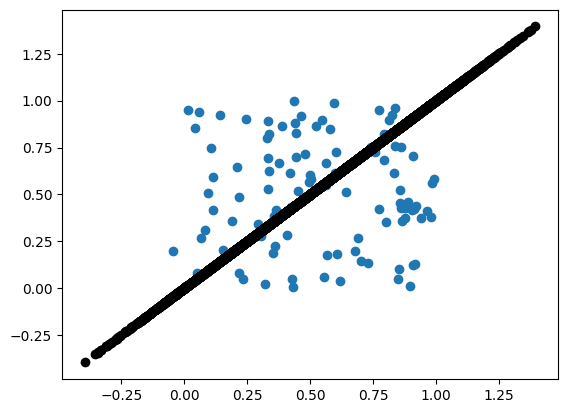

181
182
183
184
185
186
187
188
189
190


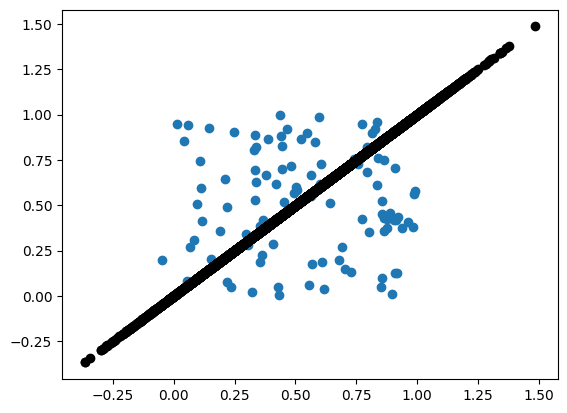

191
192
193
194
195
196
197
198
199
200


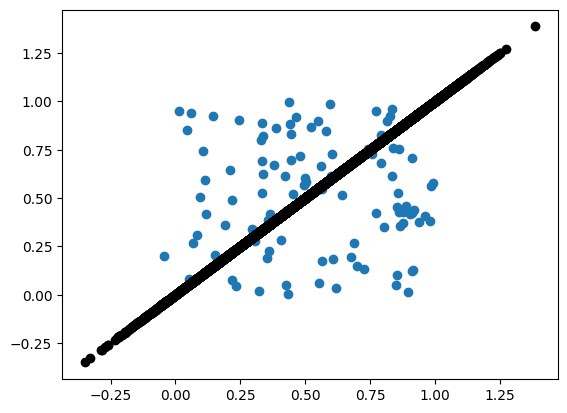

201
202
203
204
205
206
207
208
209
210


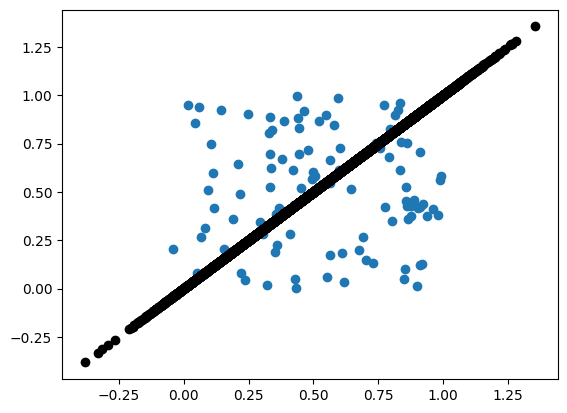

211
212
213
214
215
216
217
218
219
220


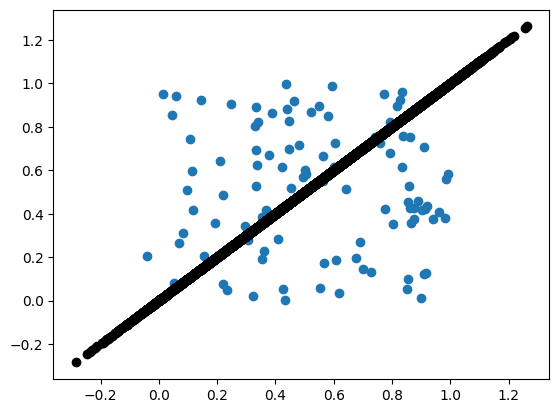

221
222
223
224
225
226
227
228
229
230


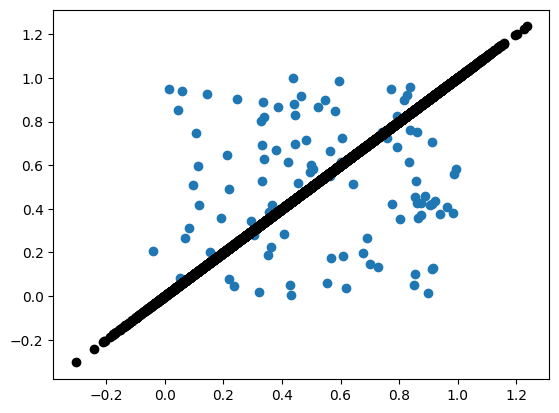

231
232
233
234
235
236
237
238
239
240


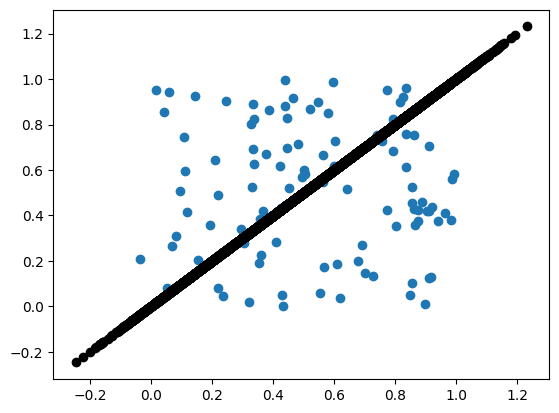

241
242
243
244
245
246
247
248
249
250


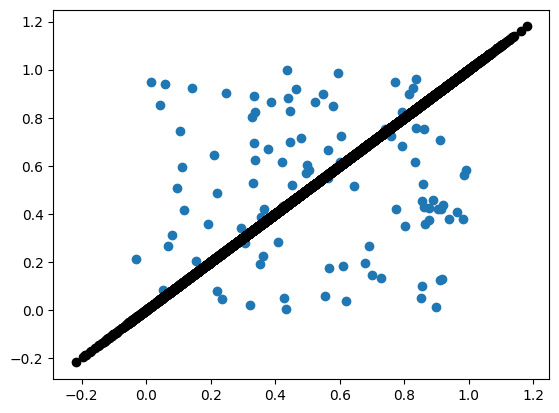

251
252
253
254
255
256
257
258
259
260


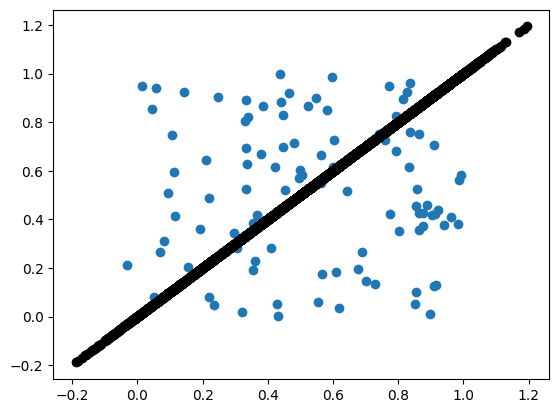

261
262
263
264
265
266
267
268
269
270


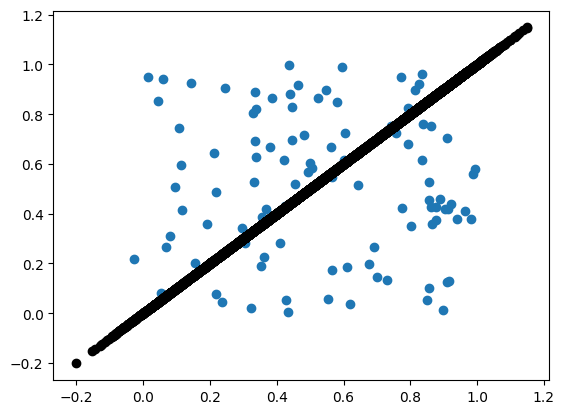

271
272
273
274
275
276
277
278
279
280


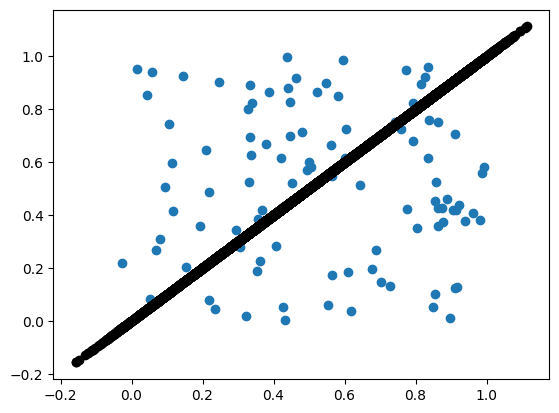

281
282
283
284
285
286
287
288
289
290


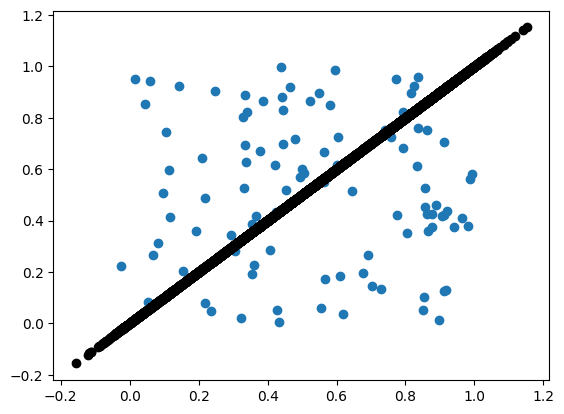

291
292
293
294
295
296
297
298
299
300


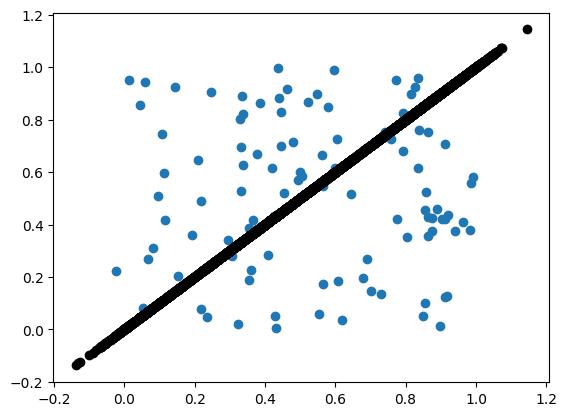

301
302
303
304
305
306
307
308
309
310


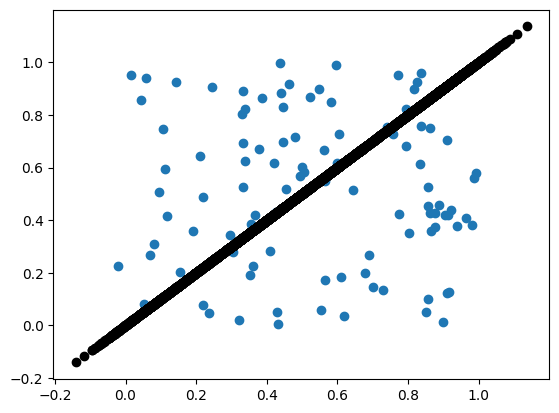

311
312
313
314
315
316
317
318
319
320


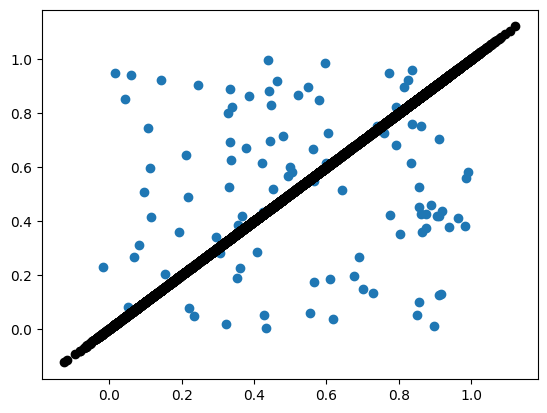

321
322
323
324
325
326
327
328
329
330


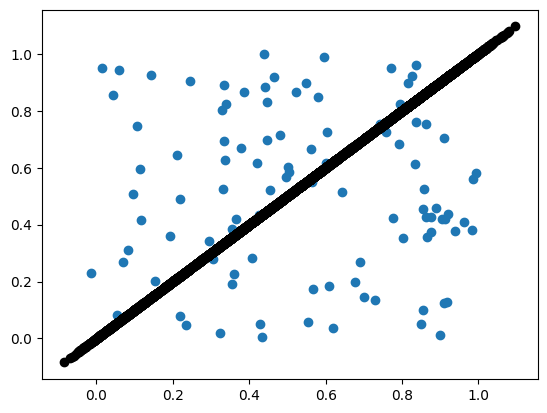

331
332
333
334
335
336
337
338
339
340


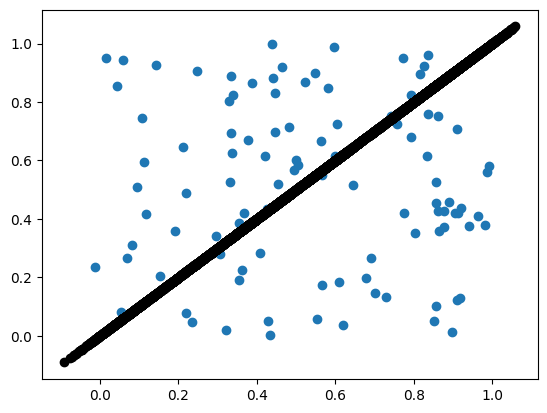

341
342
343
344
345
346
347
348
349
350


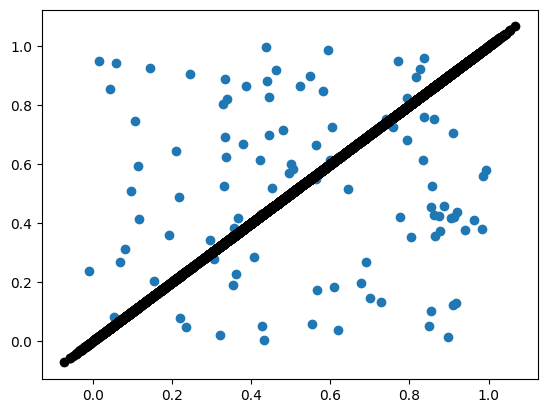

351
352
353
354
355
356
357
358
359
360


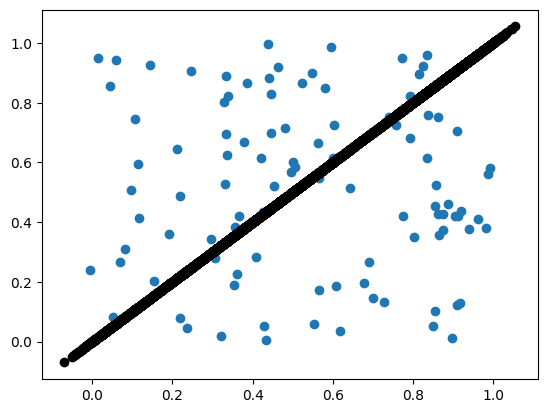

361
362
363
364
365
366
367
368
369
370


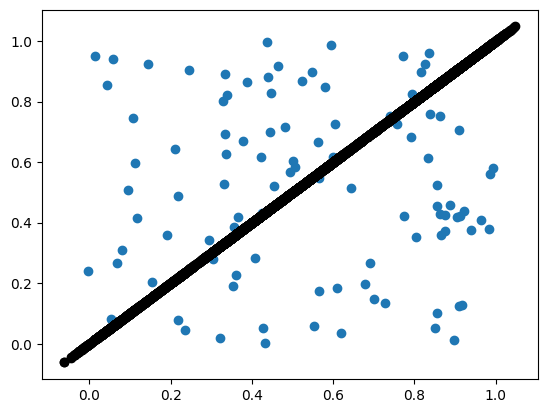

371
372
373
374
375
376
377
378
379
380


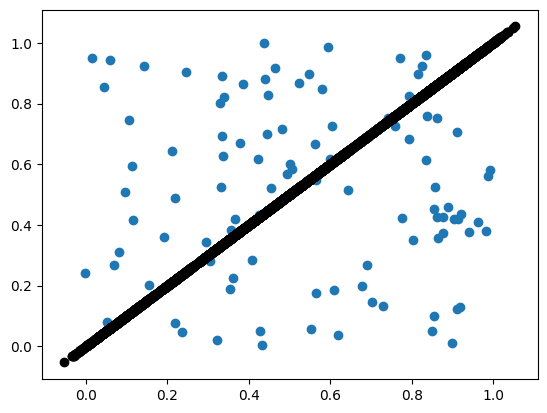

381
382
383
384
385
386
387
388
389
390


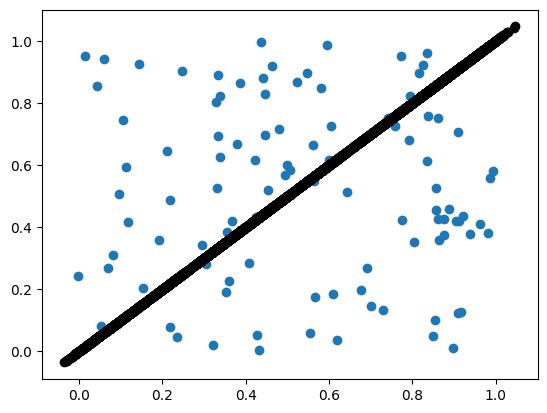

391
392
393
394
395
396
397
398
399
400


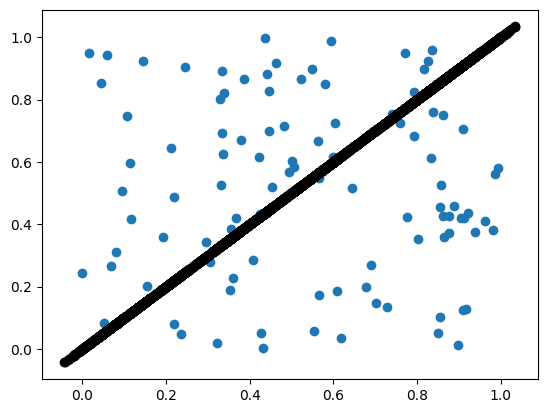

401
402
403
404
405
406
407
408
409
410


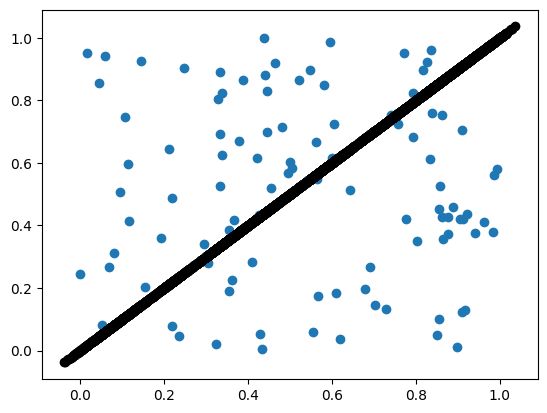

411
412
413
414
415
416
417
418
419
420


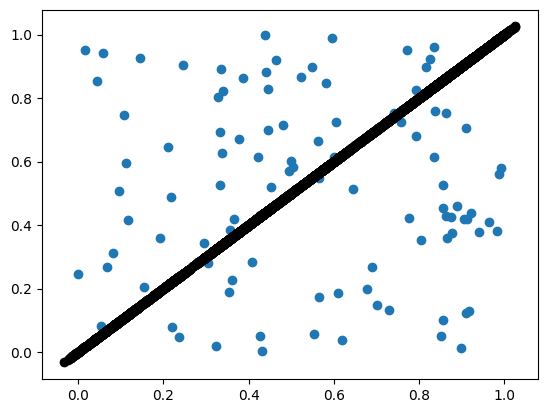

421
422
423
424
425
426
427
428
429
430


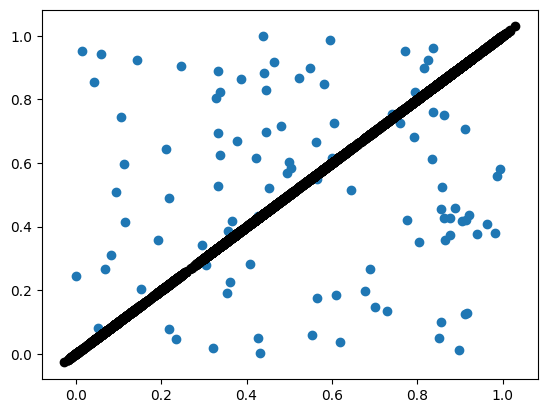

431
432
433
434
435
436
437
438
439
440


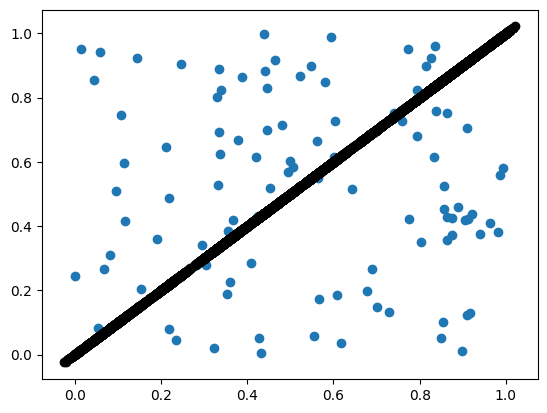

441
442
443
444
445
446
447
448
449
450


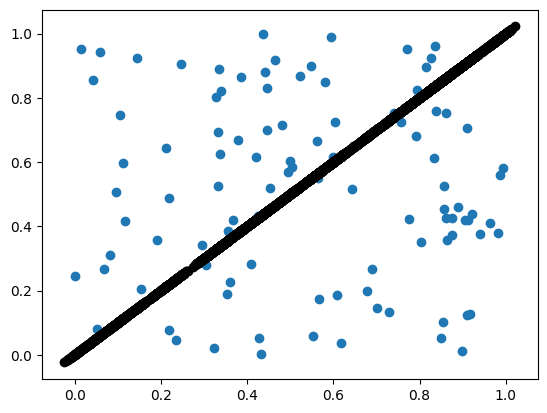

451
452
453
454
455
456
457
458
459
460


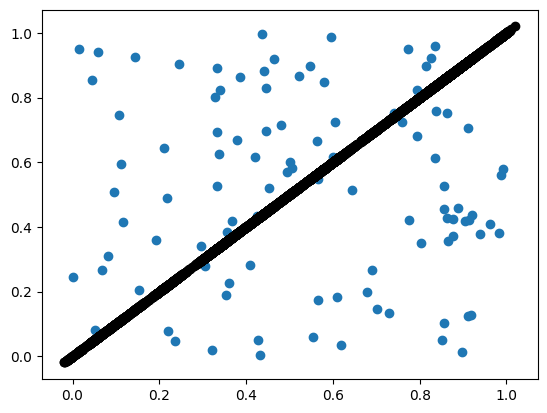

461
462
463
464
465
466
467
468
469
470


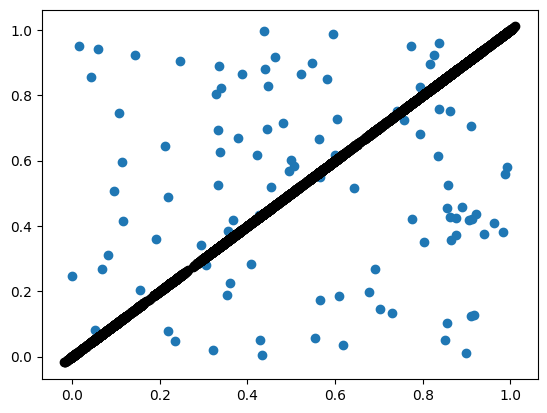

471
472
473
474
475
476
477
478
479
480


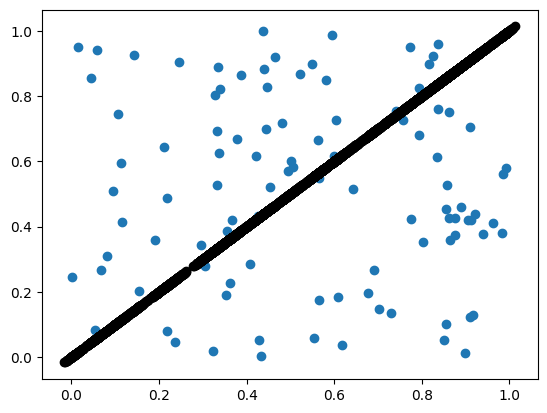

481
482
483
484
485
486
487
488
489
490


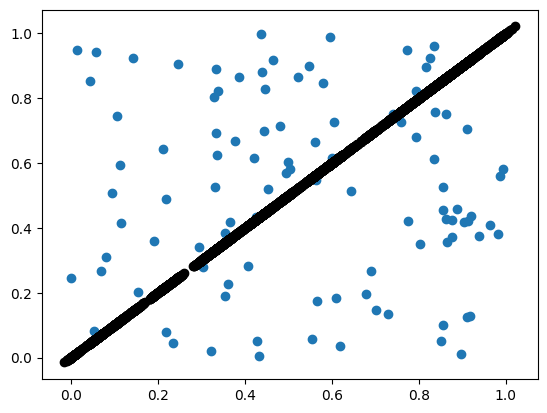

491
492
493
494
495
496
497
498
499
500


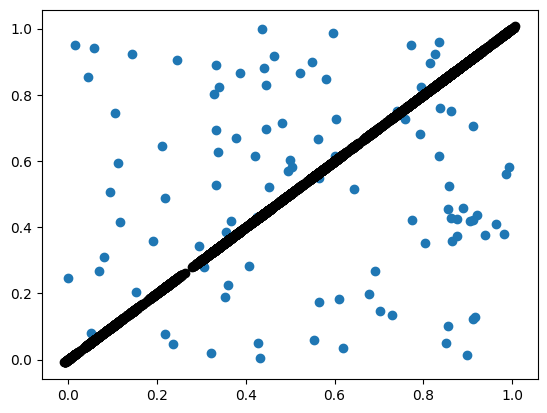

501
502
503
504
505
506
507
508
509
510


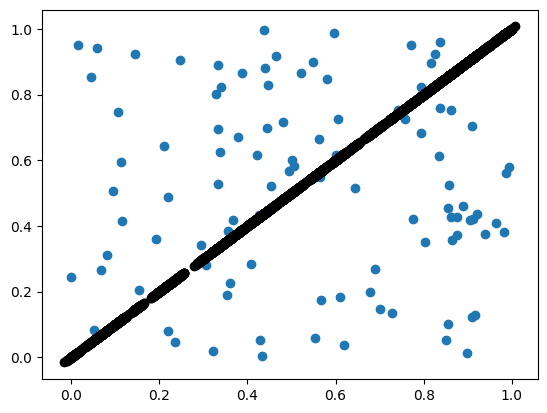

511
512
513
514
515
516
517
518
519
520


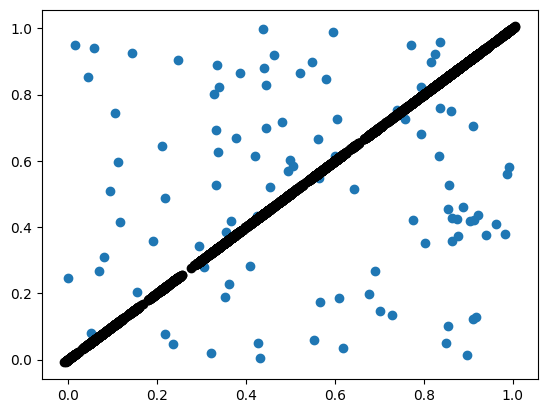

521
522
523
524
525
526
527
528
529
530


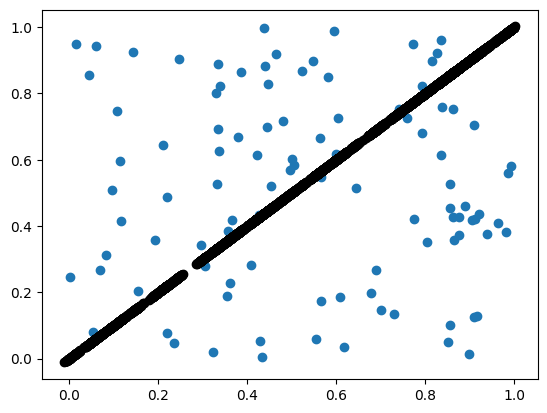

531
532
533
534
535
536
537
538
539
540


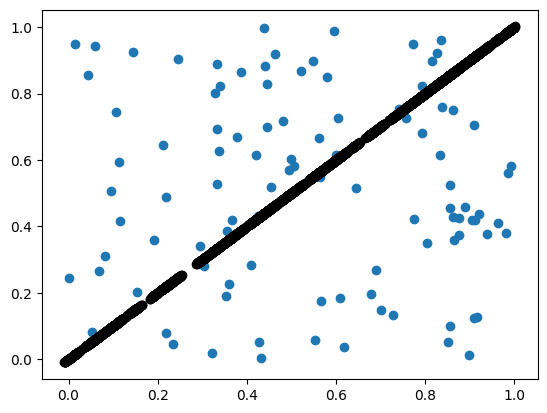

541
542
543
544
545
546
547
548
549
550


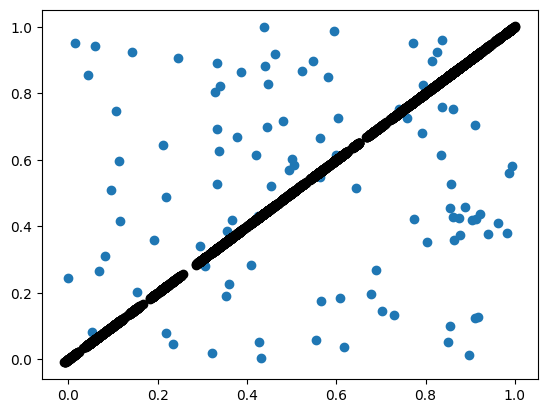

551
552
553
554
555
556
557
558
559
560


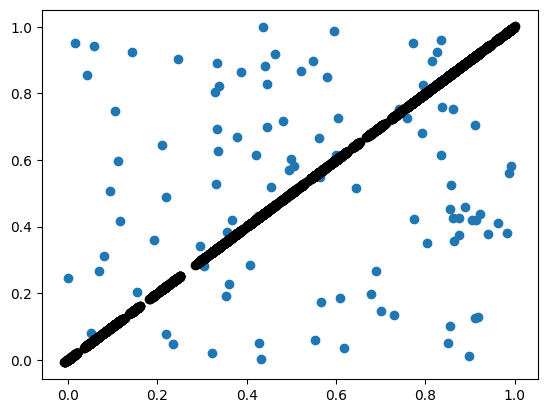

561
562
563
564
565
566
567
568
569
570


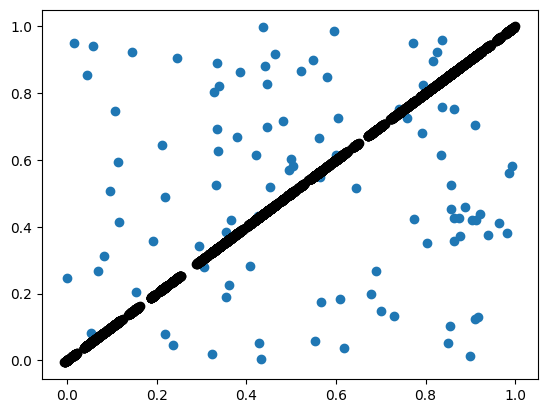

571
572
573
574
575
576
577
578
579
580


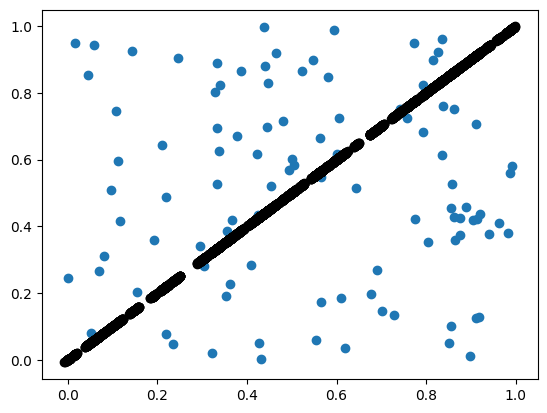

581
582
583
584
585
586
587
588
589
590


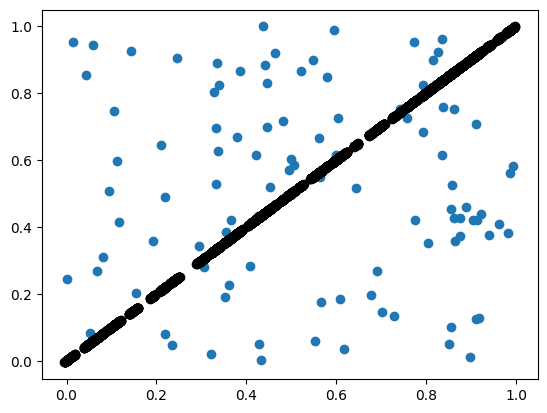

591
592
593
594
595
596
597
598
599
600


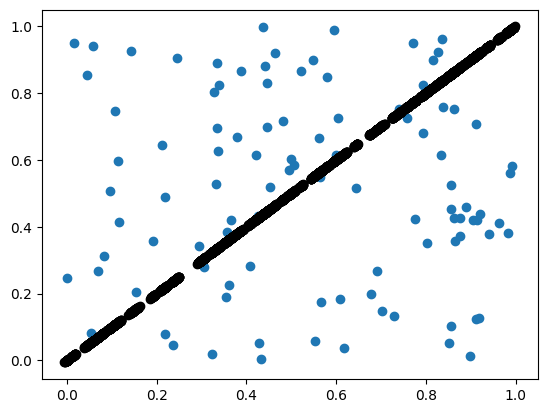

601
602
603
604
605
606
607
608
609
610


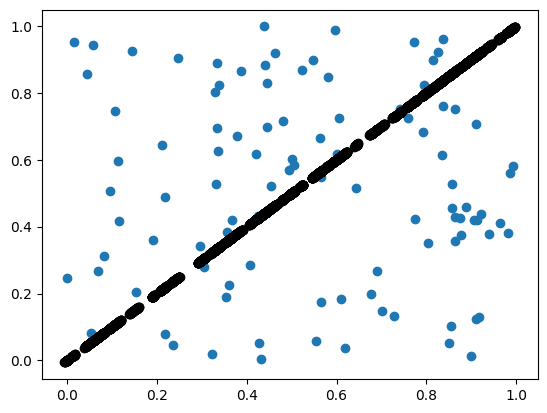

611
612
613
614
615
616
617
618
619
620


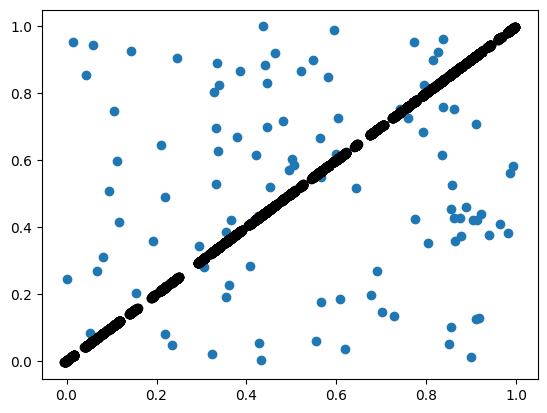

621
622
623
624
625
626
627
628
629
630


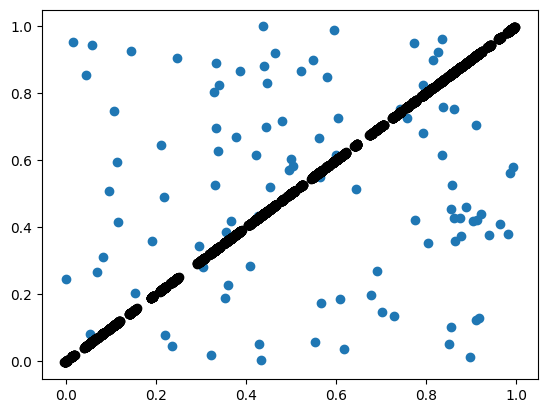

631
632
633
634
635
636
637
638
639
640


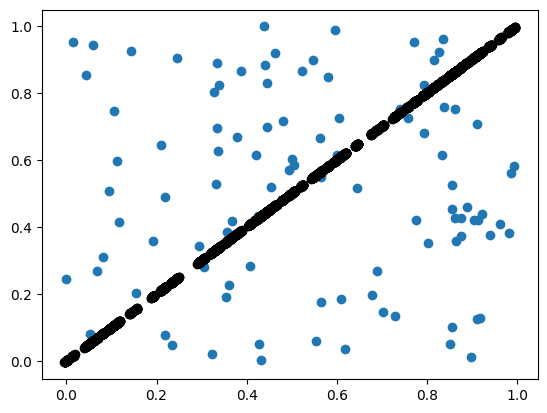

641
642
643
644
645
646
647
648
649
650


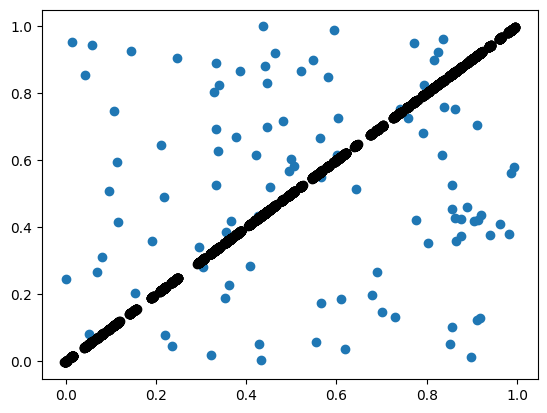

651
652
653
654
655
656
657
658
659
660


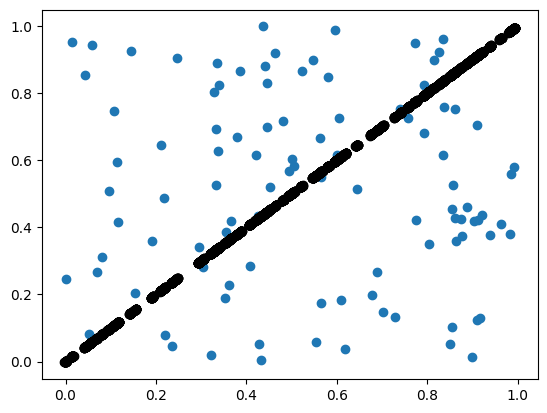

661
662
663
664
665
666
667
668
669
670


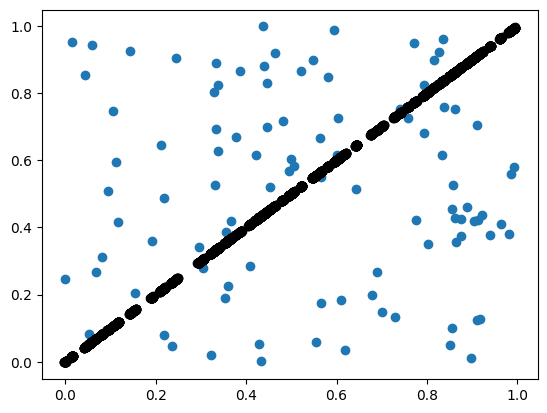

671
672
673
674
675
676
677
678
679
680


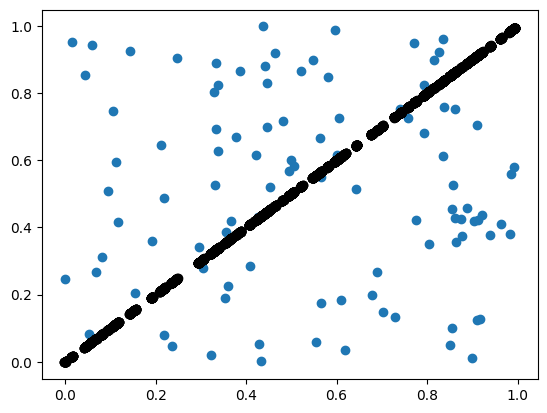

681
682
683
684
685
686
687
688
689
690


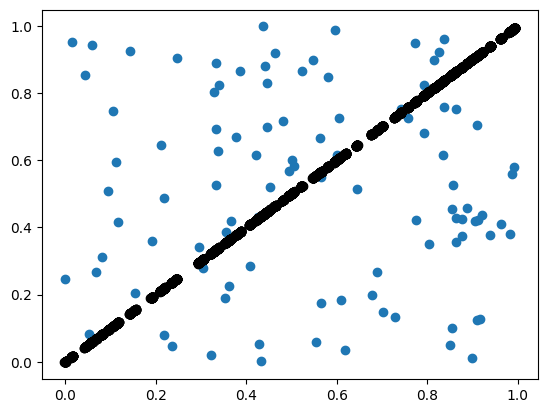

691
692
693
694
695
696
697
698
699
700


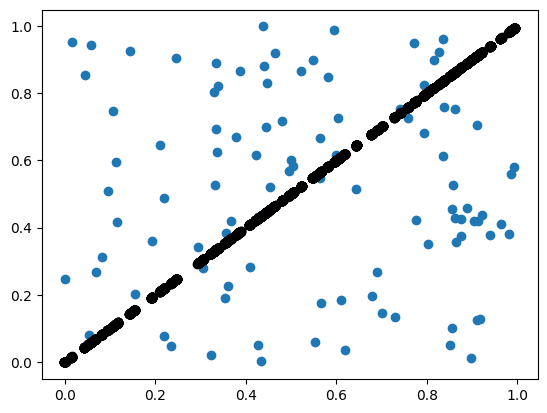

701
702
703
704
705
706
707
708
709
710


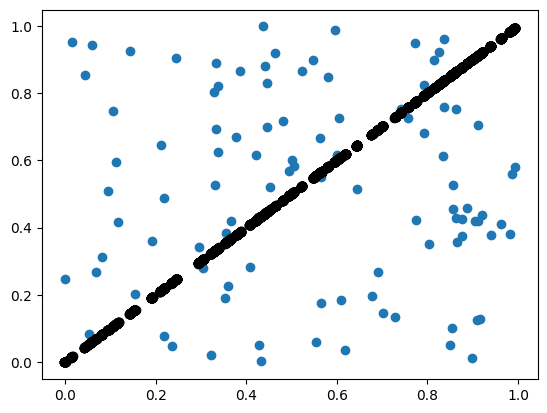

711
712
713
714
715
716
717
718
719
720


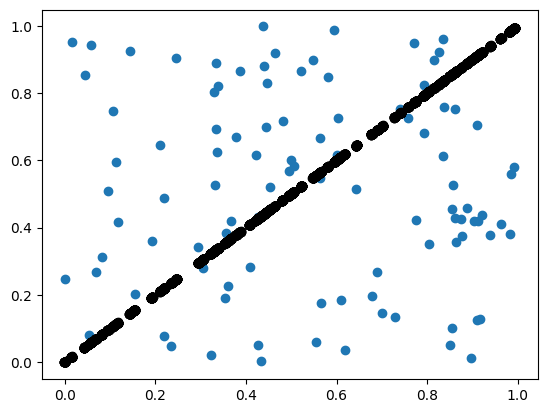

721
722
723
724
725
726
727
728
729
730


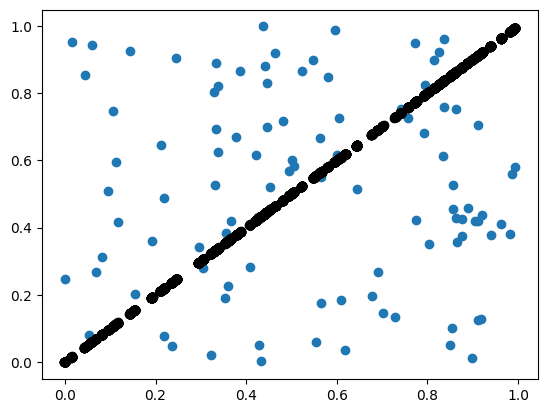

731
732
733
734
735
736
737
738
739
740


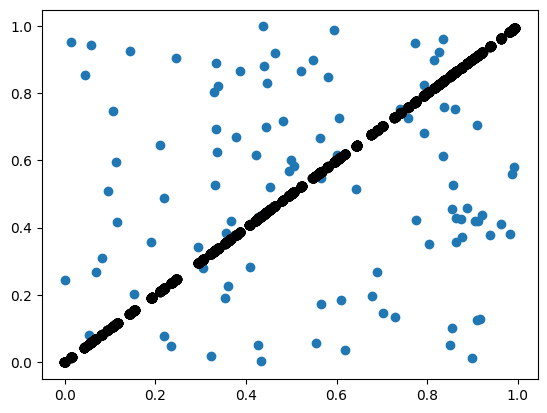

741
742
743
744
745
746
747
748
749
750


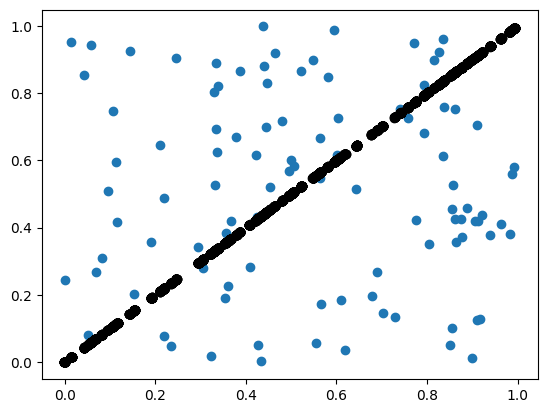

751
752
753
754
755
756
757
758
759
760


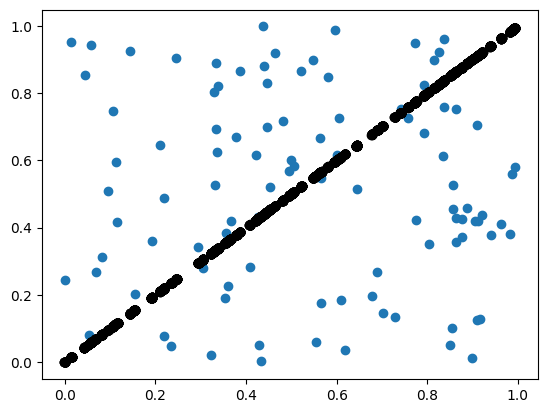

761
762
763
764
765
766
767
768
769
770


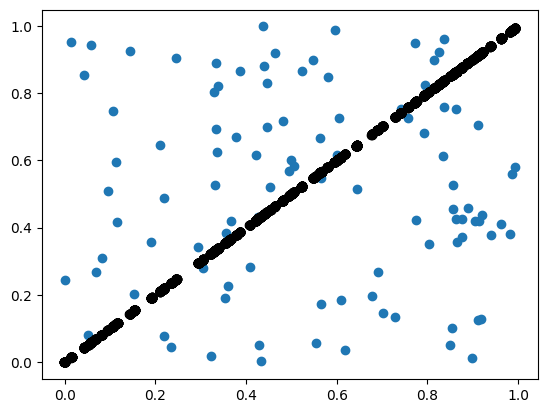

771
772
773
774
775
776
777
778
779
780


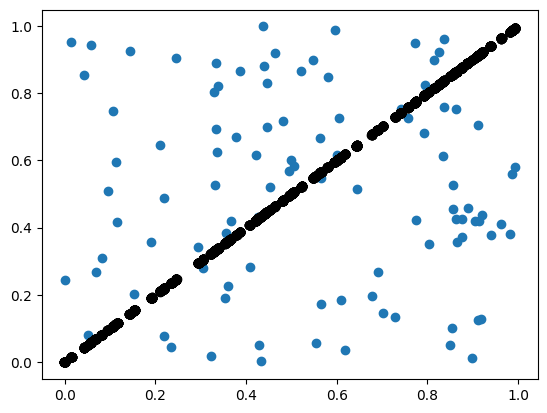

781
782
783
784
785
786
787
788
789
790


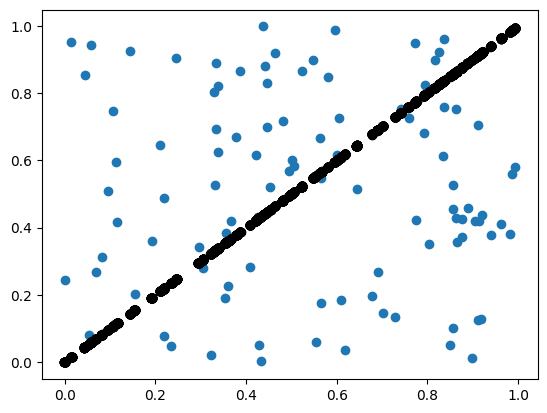

791
792
793
794
795
796
797
798
799
800


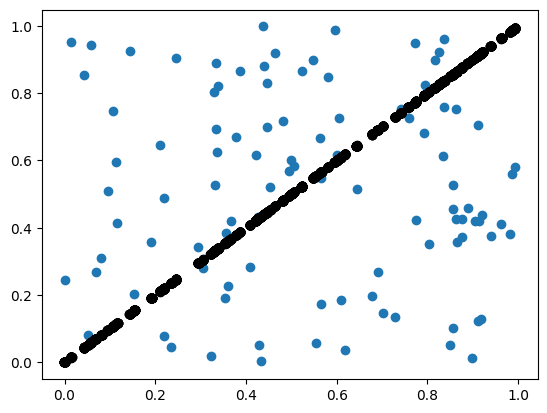

801
802
803
804
805
806
807
808
809
810


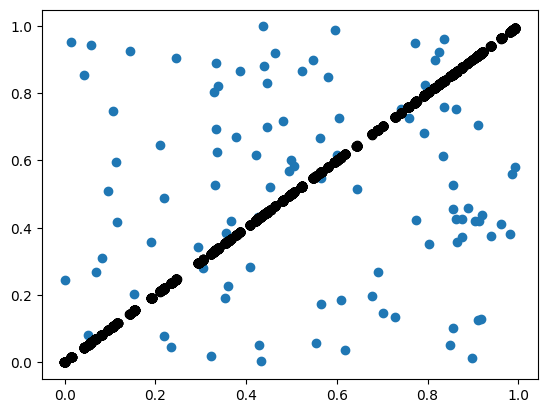

811
812
813
814
815
816
817
818
819
820


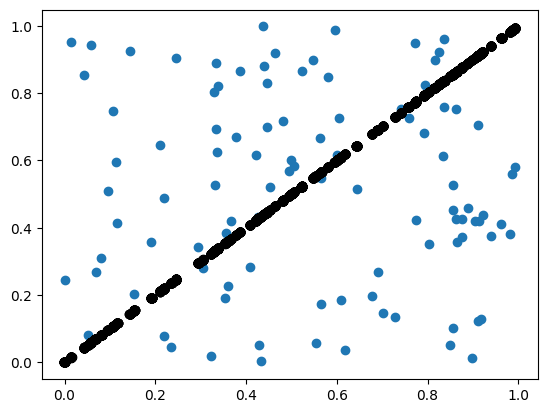

821
822
823
824
825
826
827
828
829
830


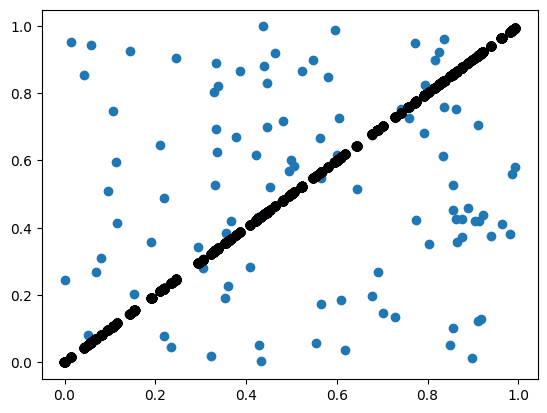

831
832
833
834
835
836
837
838
839
840


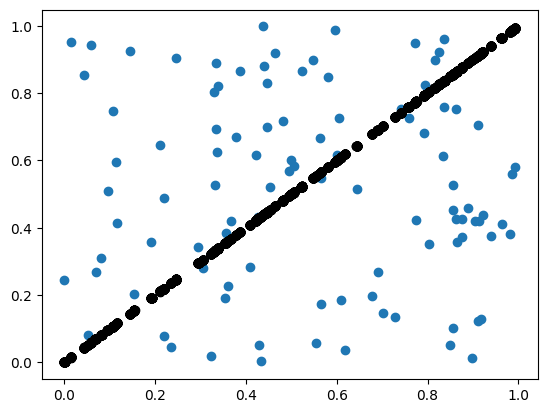

841
842
843
844
845
846
847
848
849
850


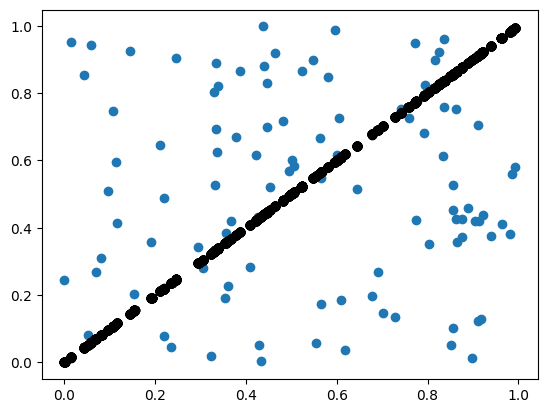

851
852
853
854
855
856
857
858
859
860


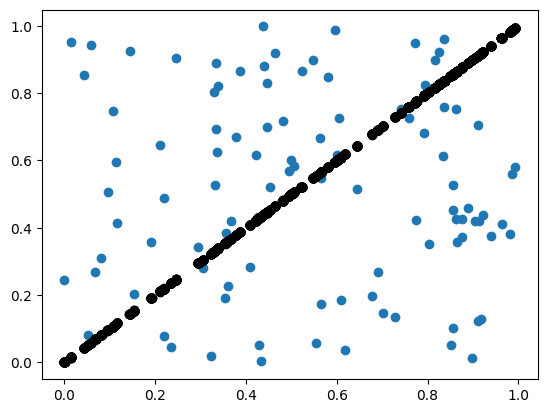

861
862
863
864
865
866
867
868
869
870


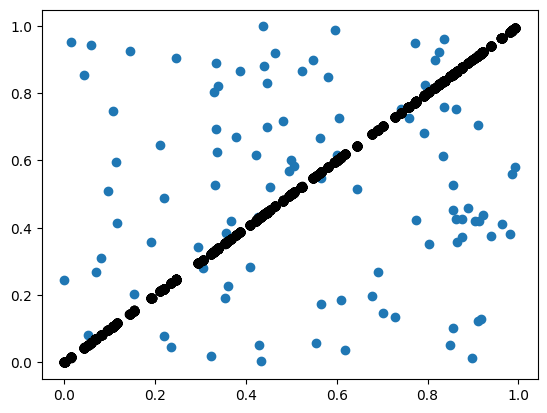

871
872
873
874
875
876
877
878
879
880


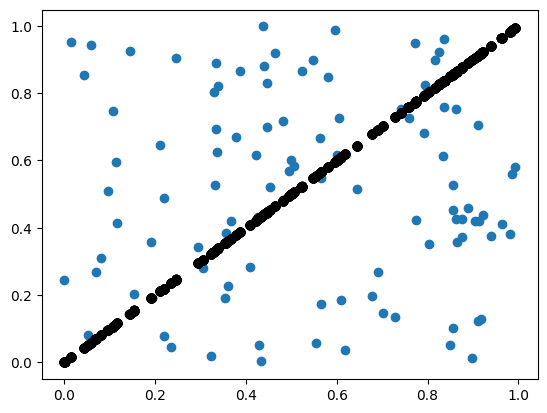

881
882
883
884
885
886
887
888
889
890


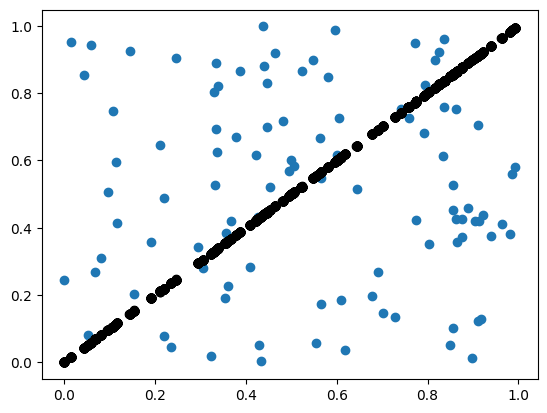

891
892
893
894
895
896
897
898
899
900


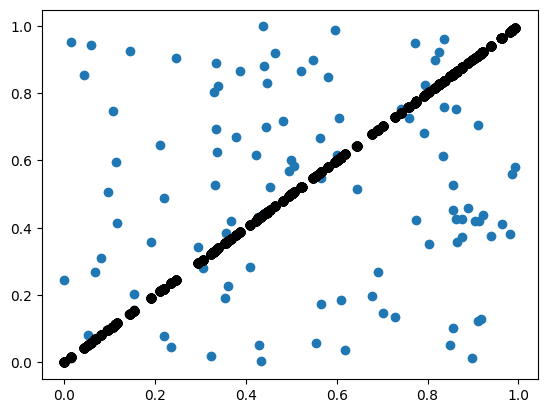

901
902
903
904
905
906
907
908
909
910


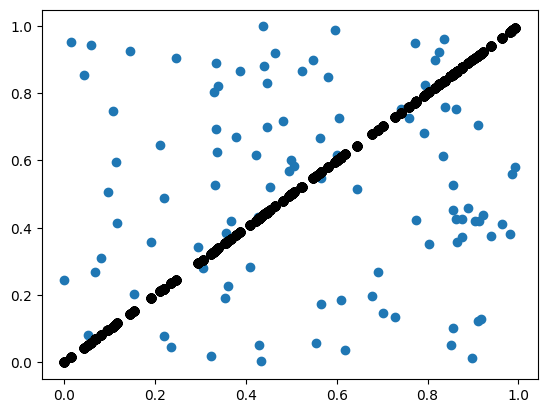

911
912
913
914
915
916
917
918
919
920


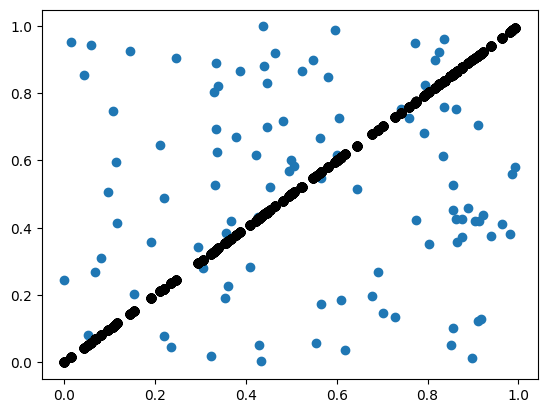

921
922
923
924
925
926
927
928
929
930


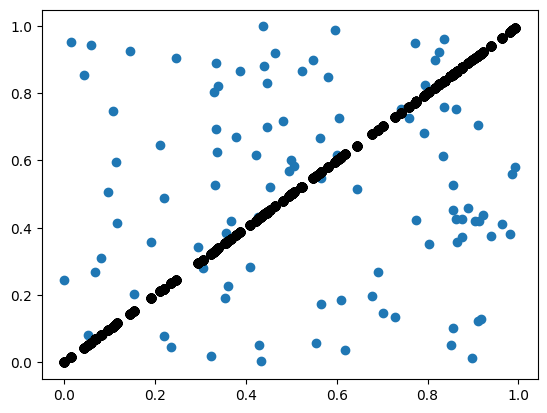

931
932
933
934
935
936
937
938
939
940


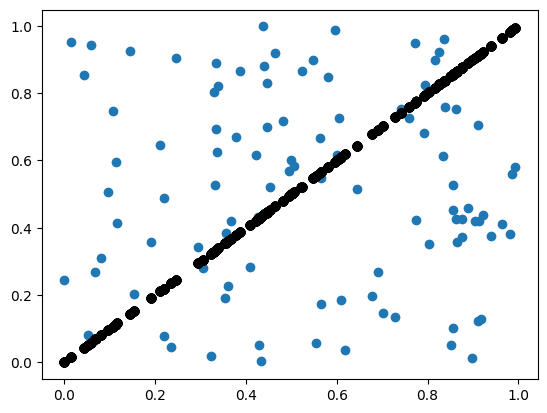

941
942
943
944
945
946
947
948
949
950


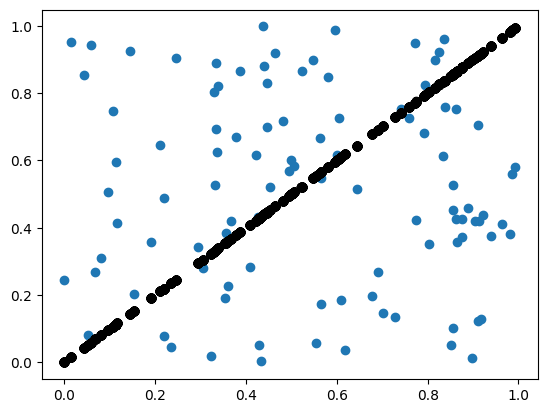

951
952
953
954
955
956
957
958
959
960


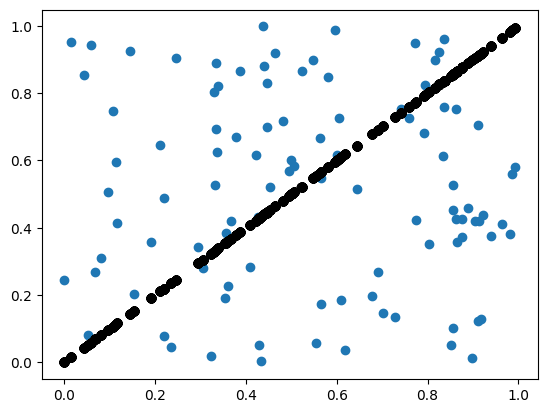

961
962
963
964
965
966
967
968
969
970


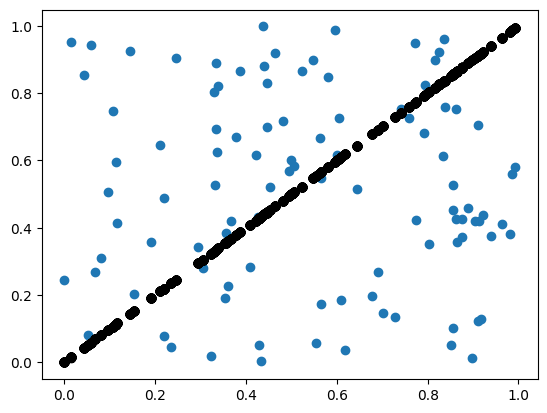

971
972
973
974
975
976
977
978
979
980


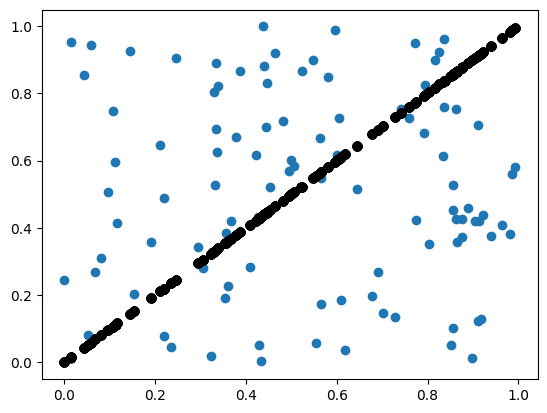

981
982
983
984
985
986
987
988
989
990


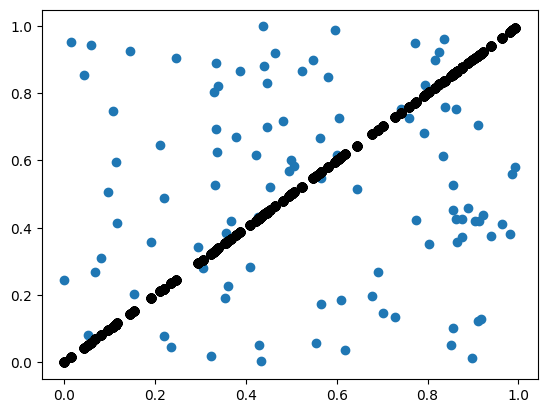

991
992
993
994
995
996
997
998
999
1000


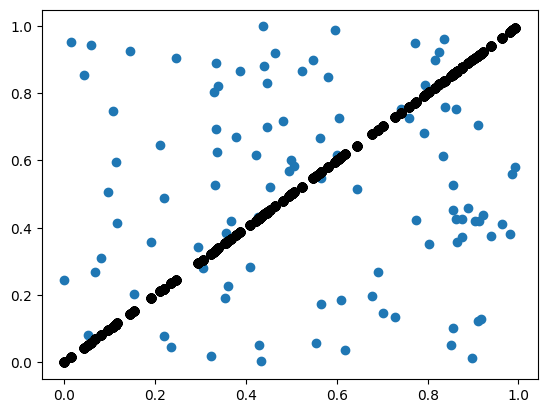

In [18]:
#initializing all of the points
from ctypes import set_errno

val = np.arange(5000)
val2 = np.arange(100)
print(val)
num = 1

#https://docs.python.org/3/library/random.html
  
setX = np.random.uniform(low=0.0, high=1.0, size = 100)  
setY = np.random.uniform(low=0.0, high=1.0, size = 100)  
#set all of the points at once

setXY[:,0] = setX
setXY[:,1] = setY

for k in range(0,1000):

  print(num)
  children = generateChild()
  #children = childrenX

  newX = map(addChild, children, val)
  newY = map(addChild, children, val)

  childrenX = np.fromiter(newX,dtype=float)
  childrenY = np.fromiter(newY,dtype=float)
  
  penP = map(pen, setX, setY)
  penK = map(pen, childrenX, childrenY)

  penaltyParent = np.fromiter(penP,dtype=float)
  penaltyKid = np.fromiter(penK, dtype=float)
  #childrenX = childrenX.reshape(100, 50)
  #childrenY = childrenY.reshape(100, 50)

  #print(penaltyParent)

  pt = map(transform, penaltyKid, children, val)
  sum1 = np.fromiter(pt, dtype=float)

  sum1 = sum1.reshape(100,50)
  
  #print(sum1)
  #setXY = setXY.reshape(100,2)

  #for i in range(100):
   # temp = sum1[i,:]
    #beta[i] = sum(temp)
  beta1 = map(add, val, sum1)
  beta = np.fromiter(beta1, dtype=float)
  
  newPX = map(addParent, setX, beta) 
  newPY = map(addParent, setY, beta)

  setX = np.fromiter(newPX, dtype=float)
  setY = np.fromiter(newPY, dtype=float)

  #print(num)
  
  if num % 10 == 0:
    plt.scatter(setX, setY)
    plt.scatter(childrenX, childrenY, color = 'k')
    plt.show()
  num += 1
